Avaliação 3 </br>
Tales Silva Leopoldino </br>
Algebra Linear Computacional </br>

[Dados de entrada]

In [1]:
import numpy as np

matriz = np.zeros((400, 31266), int)

In [2]:
from PIL import Image
import os

path = 'assets'
imagens = sorted([img for img in os.listdir(path) if img.endswith('.jpg')])

for i, imagem_nome in enumerate(imagens):
    img_path = os.path.join(path, imagem_nome)
    img = Image.open(img_path).convert('L')
    img_resized = img.resize((193, 162)) 
    matriz[i, :] = np.array(img_resized).flatten()

[Imagem média]

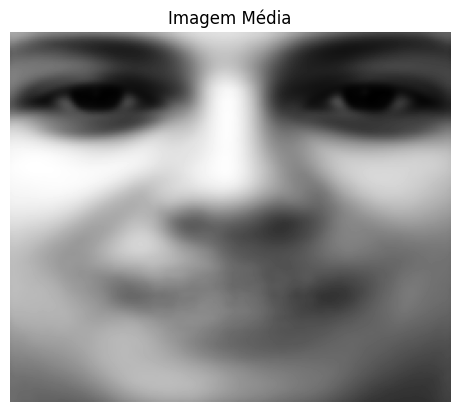

In [3]:
import matplotlib.pyplot as plt

imagem_media = np.mean(matriz, axis=0)

imagem_media_reshaped = imagem_media.reshape(162, 193)

plt.imshow(imagem_media_reshaped, cmap='gray')
plt.title("Imagem Média")
plt.axis('off')
plt.show()


[Encontrando as componentes principais]

In [4]:
matriz_centralizada = matriz - imagem_media

u, s, vh = np.linalg.svd(matriz_centralizada, full_matrices=False)

u_componentes_principais = u 

Escolha 5 das imagens e mostre como elas ficariam se usássemos apenas as primeiras 5 componentes principais.

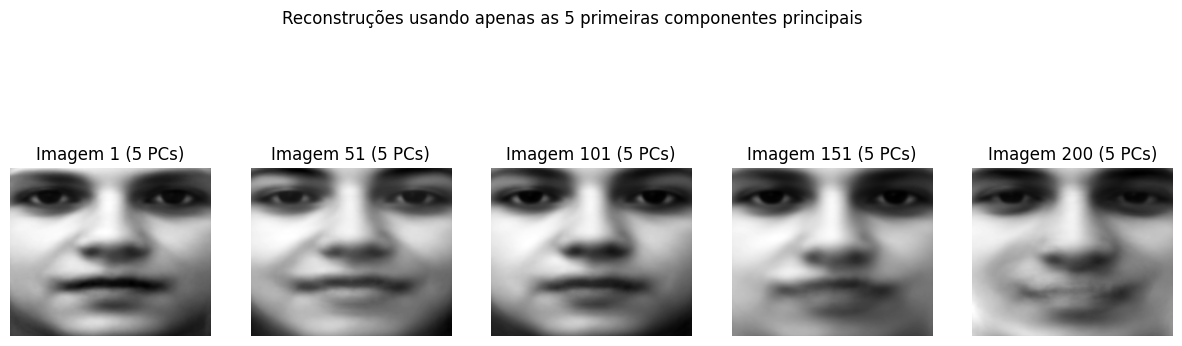

In [5]:
import matplotlib.pyplot as plt

num_componentes = 5

indices_imagens = [0, 50, 100, 150, 199]  

plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices_imagens):
    # projeções da imagem nas primeiras componentes principais
    coeficientes = np.dot(matriz_centralizada[idx, :], vh[:num_componentes, :].T)
    
    # imagem reconstruida usando apenas as primeiras componentes principais
    imagem_reconstruida = imagem_media + np.dot(coeficientes, vh[:num_componentes, :])
    imagem_reconstruida_reshaped = imagem_reconstruida.reshape(162, 193)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(imagem_reconstruida_reshaped, cmap='gray')
    plt.title(f"Imagem {idx + 1} (5 PCs)")
    plt.axis('off')

plt.suptitle("Reconstruções usando apenas as 5 primeiras componentes principais")
plt.show()


Faça duas fotos suas com resolução 162x193 pixels em tons de cinza, uma neutra e outra sorrindo no mesmo modelo das imagens fornecidas.

In [6]:
from PIL import Image
import numpy as np

caminho_imagem = 'my_pics/IMG_1396.JPG'
caminho_imagem_sorrindo = 'my_pics/IMG_1397.JPG'

# greyscale
imagem = Image.open(caminho_imagem).convert('L').resize((193, 162))
imagem_sorrindo = Image.open(caminho_imagem_sorrindo).convert('L').resize((193, 162))

imagem_vetor = np.array(imagem).flatten()
imagem_vetor_sorrindo = np.array(imagem_sorrindo).flatten()

print("Tamanho do vetor:", imagem_vetor.shape)
print("Tamanho do vetor:", imagem_vetor_sorrindo.shape)




Tamanho do vetor: (31266,)
Tamanho do vetor: (31266,)


Subtraia a imagem média de suas duas fotos e projete as diferenças no espaço gerado pelas 400 componentes principais obtidas acima.

Primeiros 10 coeficientes para a imagem:
[ 3688.08191055   -19.72337853 -1175.31228991   892.0332349
  2083.59611945   657.89340193   637.2000628   2010.17918609
  2134.0479677   1216.55200245]

Primeiros 10 coeficientes para a imagem sorrindo:
[ 3498.35980306  -130.83500954 -1333.28947836   882.15198066
  1657.08838161   869.34618887   595.62532241  2446.56772581
  1921.02467195  1210.11445661]


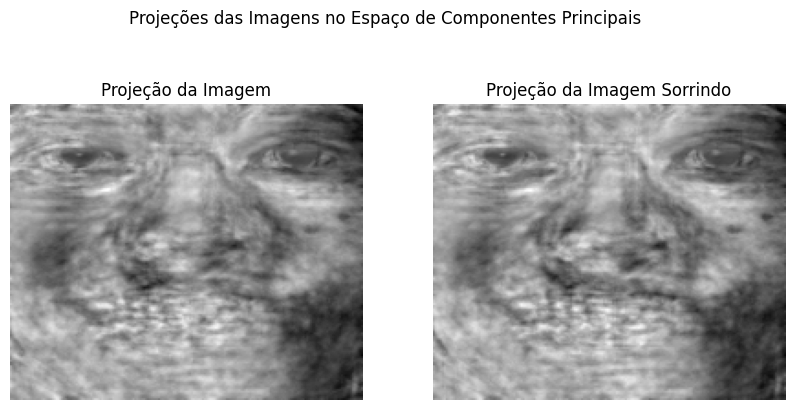

In [7]:
import matplotlib.pyplot as plt

imagem_diferenca = imagem_vetor - imagem_media
imagem_diferenca_sorrindo = imagem_vetor_sorrindo - imagem_media

# projetar diferenças no espaço das 400 componentes principais
coeficientes_imagem = np.dot(imagem_diferenca, vh.T)
coeficientes_imagem_sorrindo = np.dot(imagem_diferenca_sorrindo, vh.T)

print("Primeiros 10 coeficientes para a imagem:")
print(coeficientes_imagem[:10])

print("\nPrimeiros 10 coeficientes para a imagem sorrindo:")
print(coeficientes_imagem_sorrindo[:10])

# reconstruir as projeções usando todos os 400 coeficientes
projecao_imagem = imagem_media + np.dot(coeficientes_imagem, vh)
projecao_imagem_sorrindo = imagem_media + np.dot(coeficientes_imagem_sorrindo, vh)

projecao_imagem_reshaped = projecao_imagem.reshape(162, 193)
projecao_imagem_sorrindo_reshaped = projecao_imagem_sorrindo.reshape(162, 193)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(projecao_imagem_reshaped, cmap='gray')
plt.title("Projeção da Imagem")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(projecao_imagem_sorrindo_reshaped, cmap='gray')
plt.title("Projeção da Imagem Sorrindo")
plt.axis('off')

plt.suptitle("Projeções das Imagens no Espaço de Componentes Principais")
plt.show()


Os primeiros 10 coeficientes 
(𝑎1,𝑎2,…,𝑎10) fornecem uma representação simplificada de cada imagem nas dimensões mais significativas do espaço gerado pelas componentes principais. Os coeficientes diferem entre a imagem original e a imagem sorrindo, refletindo as variações nas expressões faciais. A reconstrução (ou projeção) de cada imagem a partir desses coeficientes deve aproximar a aparência original, destacando as principais diferenças visuais sem todos os detalhes.

[Classificação]

Acurácia com 2 componentes principais:
- Mínimos Quadrados: 52.50%
- Perceptron: 53.06%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


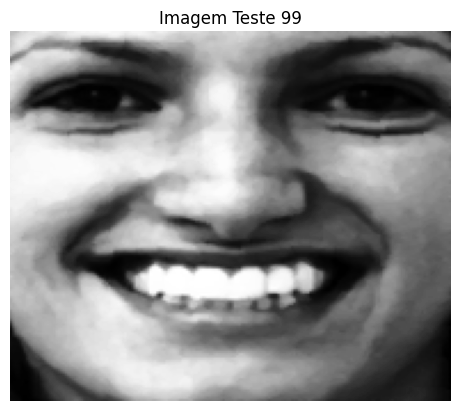



Acurácia com 50 componentes principais:
- Mínimos Quadrados: 58.61%
- Perceptron: 60.56%

Previsão para o índice de teste 99:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


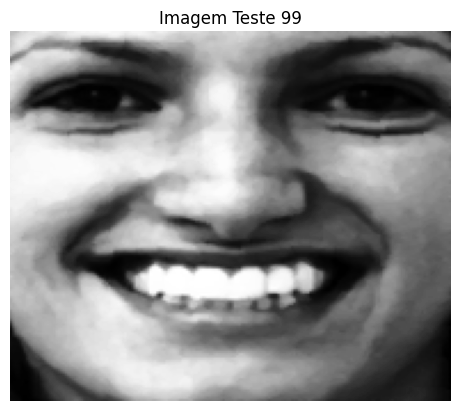

In [21]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  # Reshape de acordo com o tamanho da imagem
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_mulheres = [ 397, 396, 395, 394, 393, 392, 391, 390, 367, 366, 365, 364, 90, 91, 92, 93, 96, 97, 98 ,99]
indices_homens = [ 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 38, 39, 104, 105]

# imagens e rótulos para treino
X_treino = np.vstack([matriz[idx] for idx in indices_mulheres + indices_homens])
y_treino = np.array([1] * len(indices_mulheres) + [-1] * len(indices_homens))

# extraindo as imagens de teste
X_teste = np.delete(matriz, indices_mulheres + indices_homens, axis=0)

def treinar_e_avaliar(n_componentes, indice_teste):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    # minimos quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # vetor de rótulos reais para teste
    num_homens_teste = (len(X_teste_reduzido) // 2) 
    num_mulheres_teste = len(X_teste_reduzido) - num_homens_teste
    y_verdadeiro = np.array([1] * num_mulheres_teste + [-1] * num_homens_teste)
    
    acuracia_regressao = accuracy_score(y_verdadeiro, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Mulher' if previsao_regressao == 1 else 'Homem'}")
        print(f"- Perceptron: {'Mulher' if previsao_perceptron == 1 else 'Homem'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

indice_teste = 99  

treinar_e_avaliar(2, indice_teste)
print('\n')

treinar_e_avaliar(50, indice_teste)



índice 0:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


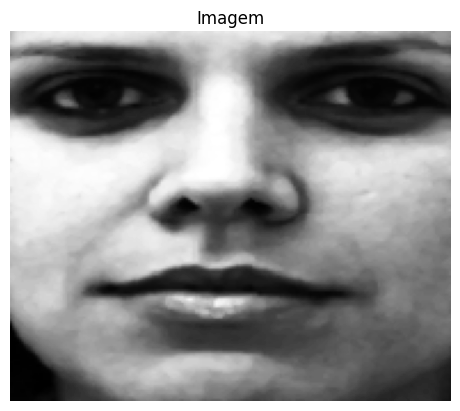


índice 1:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


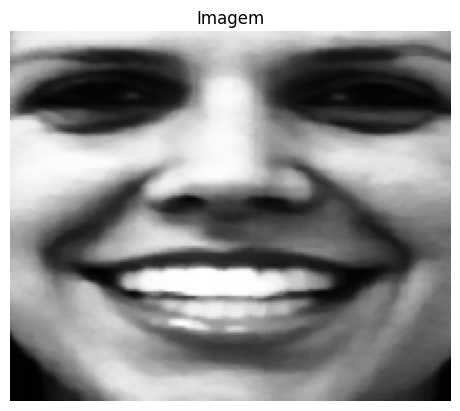


índice 2:
- Mínimos Quadrados: Homem
- Perceptron: Mulher


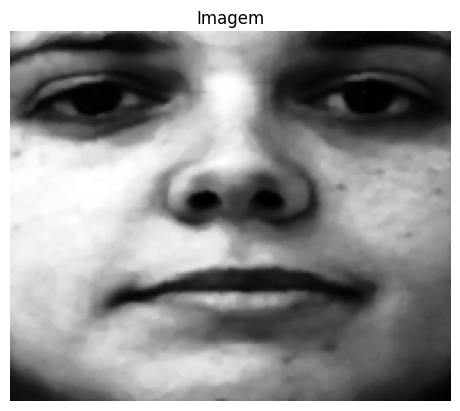


índice 3:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


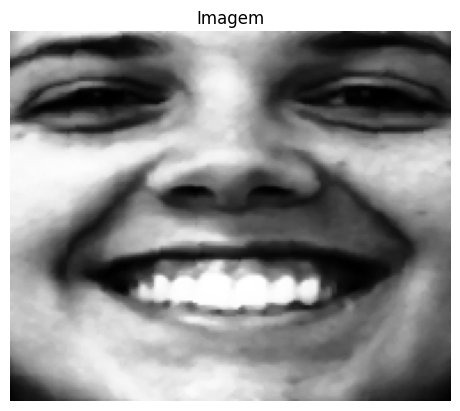


índice 4:
- Mínimos Quadrados: Homem
- Perceptron: Mulher


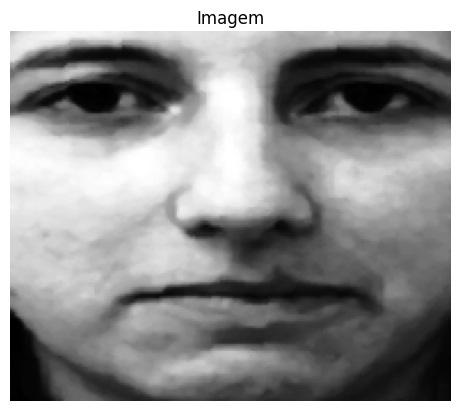


índice 5:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


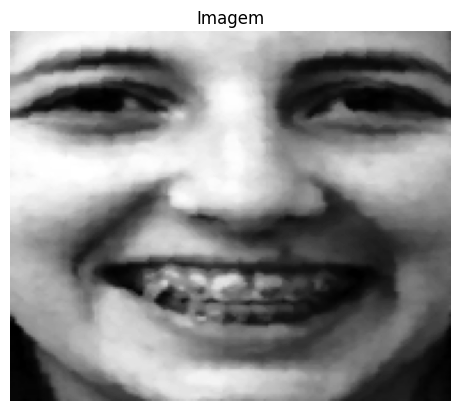


índice 6:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


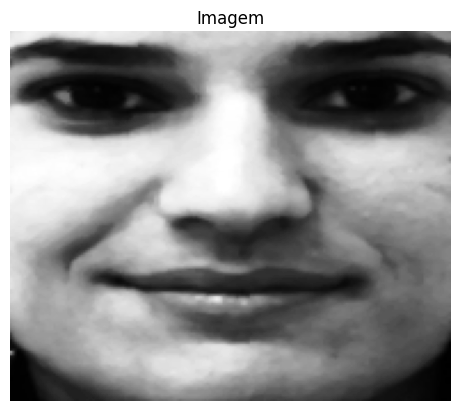


índice 7:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


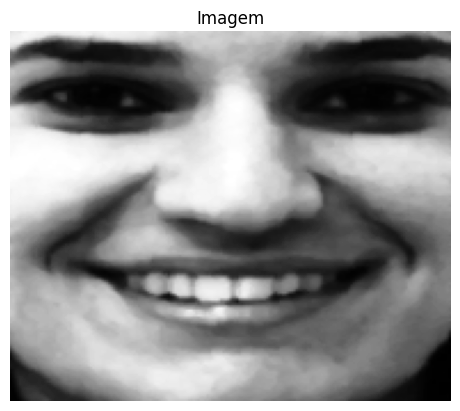


índice 8:
- Mínimos Quadrados: Homem
- Perceptron: Mulher


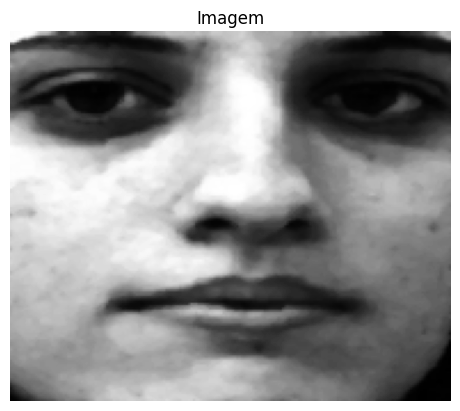


índice 9:
- Mínimos Quadrados: Mulher
- Perceptron: Mulher


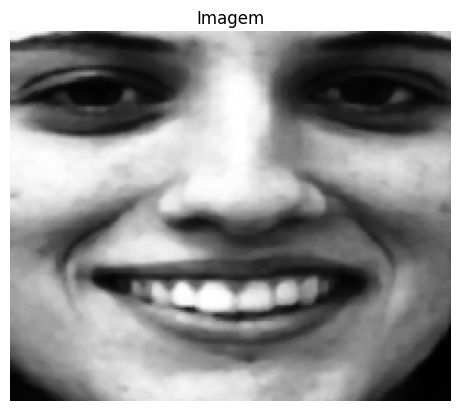

In [9]:
def treinar_e_avaliar(n_componentes, indice_teste):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_mulheres + indices_homens]
    X_teste_reduzido = np.delete(X_reduzido, indices_mulheres + indices_homens, axis=0)

    # minimos quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)


    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\níndice {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Mulher' if previsao_regressao == 1 else 'Homem'}")
        print(f"- Perceptron: {'Mulher' if previsao_perceptron == 1 else 'Homem'}")

    else:
        print("Índice de teste fora do intervalo.")

for i in range (10):
    treinar_e_avaliar(3, i)
    mostrar_imagem(matriz[i])

Repita a operação 6 para classificar se a pessoa da foto está sorrindo ou não

Acurácia com 2 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 51.39%
- Perceptron: 50.83%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


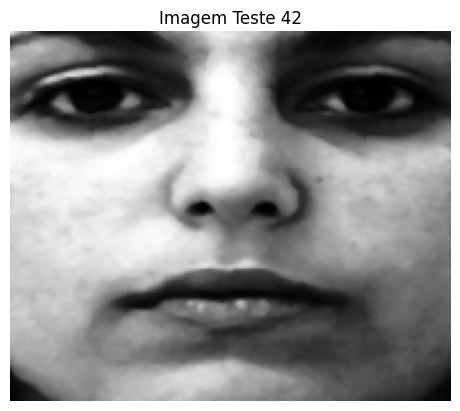

Acurácia com 100 componentes principais para classificação de sorriso:
- Mínimos Quadrados: 50.28%
- Perceptron: 50.28%

Previsão para o índice de teste 42:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


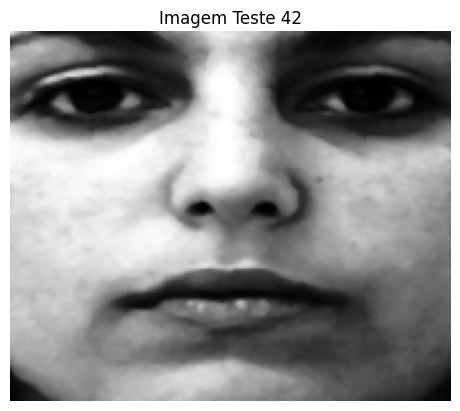

In [24]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_sorrindo = [1, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] 
indices_nao_sorrindo = [0, 40, 42, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]  

X_treino_sorrindo = np.vstack([matriz[idx] for idx in indices_sorrindo])
y_treino_sorrindo = np.array([1] * len(indices_sorrindo)) 

X_treino_nao_sorrindo = np.vstack([matriz[idx] for idx in indices_nao_sorrindo])
y_treino_nao_sorrindo = np.array([-1] * len(indices_nao_sorrindo))

# combinar os dados de treino
X_treino = np.vstack([X_treino_sorrindo, X_treino_nao_sorrindo])
y_treino = np.concatenate([y_treino_sorrindo, y_treino_nao_sorrindo])

# extrair as imagens de teste
X_teste = np.delete(matriz, indices_sorrindo + indices_nao_sorrindo, axis=0)

def treinar_e_avaliar_sorriso(n_componentes, indice_teste):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_sorrindo + indices_nao_sorrindo]
    X_teste_reduzido = np.delete(X_reduzido, indices_sorrindo + indices_nao_sorrindo, axis=0)

    # minimos quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    
    # vetor de rótulos reais para teste
    num_nao_sorrindo_teste = len(X_teste_reduzido) // 2
    num_sorrindo_teste = len(X_teste_reduzido) - num_nao_sorrindo_teste
    y_verdadeiro = np.array([1] * num_sorrindo_teste + [-1] * num_nao_sorrindo_teste)
    
    acuracia_regressao = accuracy_score(y_verdadeiro, y_pred_regressao)
    acuracia_perceptron = accuracy_score(y_verdadeiro, y_pred_perceptron)

    print(f"Acurácia com {n_componentes} componentes principais para classificação de sorriso:")
    print(f"- Mínimos Quadrados: {acuracia_regressao:.2%}")
    print(f"- Perceptron: {acuracia_perceptron:.2%}")

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\nPrevisão para o índice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Sorrindo' if previsao_regressao == 1 else 'Não Sorrindo'}")
        print(f"- Perceptron: {'Sorrindo' if previsao_perceptron == 1 else 'Não Sorrindo'}")

        imagem_teste = X_teste[indice_teste]
        mostrar_imagem(imagem_teste, titulo=f"Imagem Teste {indice_teste}")

    else:
        print("Índice de teste fora do intervalo.")

indice_teste = 42  

treinar_e_avaliar_sorriso(2, indice_teste)

treinar_e_avaliar_sorriso(100, indice_teste)


Overfitting ao aumentar o número de componentes principais, redução de dimensionalidade não garante melhora contínua


índice de teste 0:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


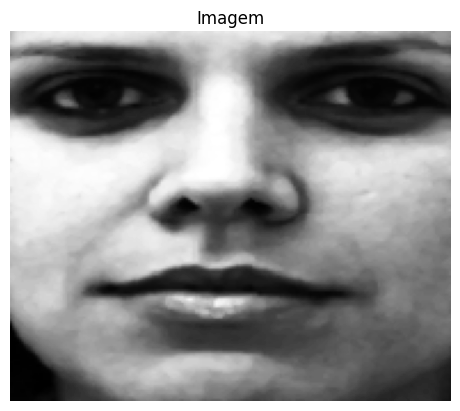


índice de teste 1:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


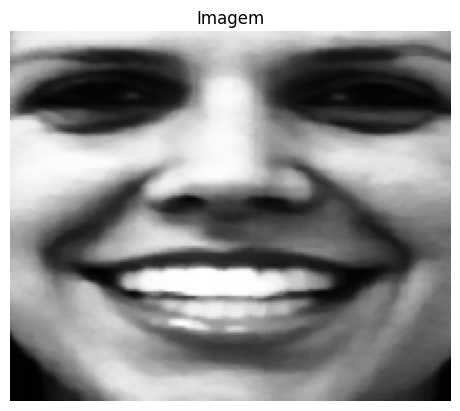


índice de teste 2:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


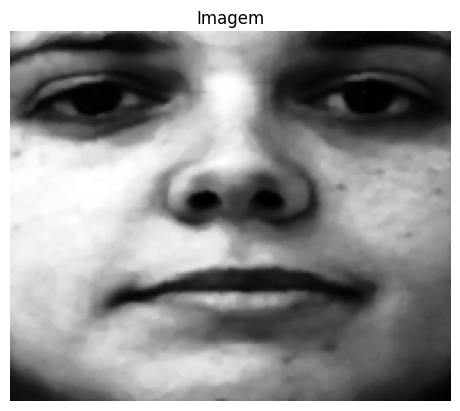


índice de teste 3:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Sorrindo


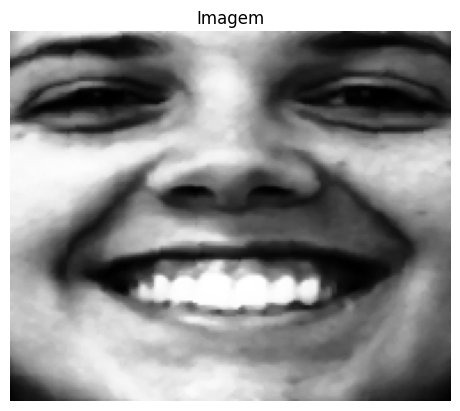


índice de teste 4:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


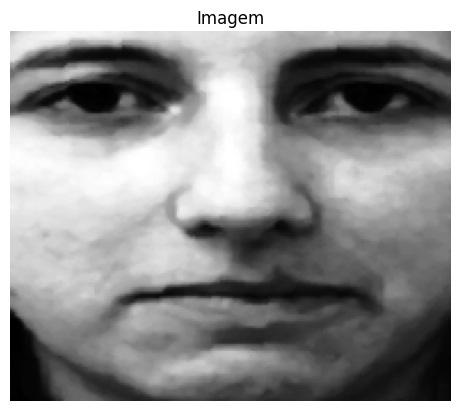


índice de teste 5:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


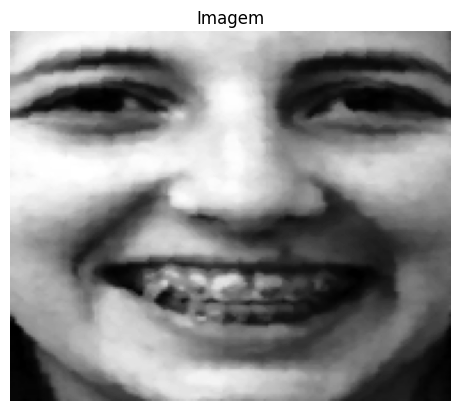


índice de teste 6:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


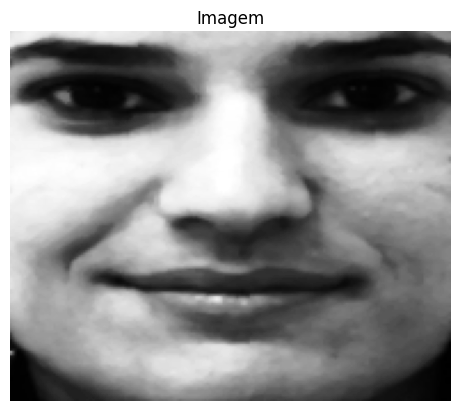


índice de teste 7:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


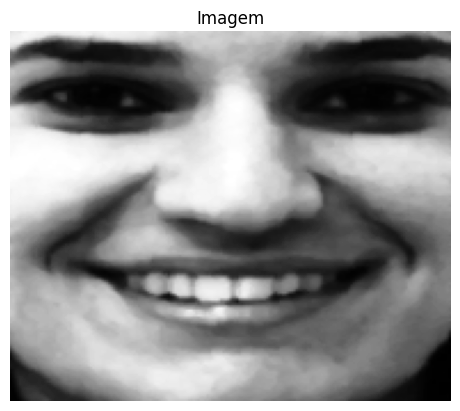


índice de teste 8:
- Mínimos Quadrados: Não Sorrindo
- Perceptron: Não Sorrindo


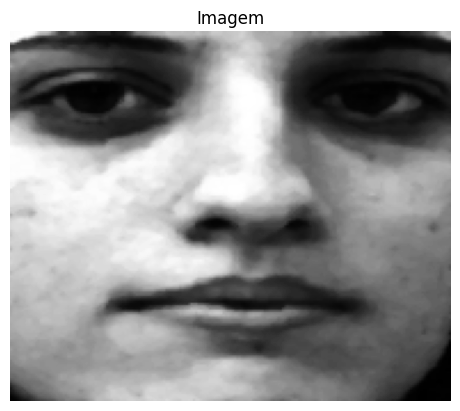


índice de teste 9:
- Mínimos Quadrados: Sorrindo
- Perceptron: Sorrindo


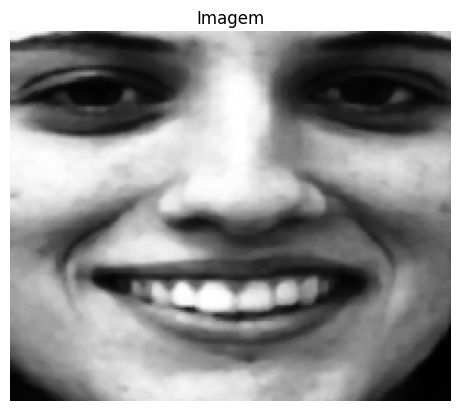

In [11]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def reduzir_dimensionalidade(matriz, n_componentes):
    svd = TruncatedSVD(n_components=n_componentes)
    return svd.fit_transform(matriz)

def mostrar_imagem(imagem, titulo="Imagem"):
    imagem_reshape = imagem.reshape(162, 193)  
    plt.imshow(imagem_reshape, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

indices_sorrindo = [1, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] 
indices_nao_sorrindo = [0, 40, 42, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]  

X_treino_sorrindo = np.vstack([matriz[idx] for idx in indices_sorrindo])
y_treino_sorrindo = np.array([1] * len(indices_sorrindo)) 

X_treino_nao_sorrindo = np.vstack([matriz[idx] for idx in indices_nao_sorrindo])
y_treino_nao_sorrindo = np.array([-1] * len(indices_nao_sorrindo))

# combinar os dados de treino
X_treino = np.vstack([X_treino_sorrindo, X_treino_nao_sorrindo])
y_treino = np.concatenate([y_treino_sorrindo, y_treino_nao_sorrindo])

# extrair as imagens de teste
X_teste = np.delete(matriz, indices_sorrindo + indices_nao_sorrindo, axis=0)

def treinar_e_avaliar_sorriso(n_componentes, indice_teste):
    X_reduzido = reduzir_dimensionalidade(matriz, n_componentes)
    
    # dados de treino e teste após a redução
    X_treino_reduzido = X_reduzido[indices_sorrindo + indices_nao_sorrindo]
    X_teste_reduzido = np.delete(X_reduzido, indices_sorrindo + indices_nao_sorrindo, axis=0)

    # minimos quadrados
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_treino_reduzido, y_treino)
    y_pred_regressao = modelo_regressao.predict(X_teste_reduzido)
    y_pred_regressao = np.where(y_pred_regressao >= 0, 1, -1)
    
    # perceptron
    modelo_perceptron = Perceptron()
    modelo_perceptron.fit(X_treino_reduzido, y_treino)
    y_pred_perceptron = modelo_perceptron.predict(X_teste_reduzido)
    

    if 0 <= indice_teste < len(X_teste_reduzido):
        previsao_regressao = y_pred_regressao[indice_teste]
        previsao_perceptron = y_pred_perceptron[indice_teste]

        print(f"\níndice de teste {indice_teste}:")
        print(f"- Mínimos Quadrados: {'Sorrindo' if previsao_regressao == 1 else 'Não Sorrindo'}")
        print(f"- Perceptron: {'Sorrindo' if previsao_perceptron == 1 else 'Não Sorrindo'}")
    else:
        print("Índice de teste fora do intervalo.")

for i in range (10):
    treinar_e_avaliar_sorriso(3, i)
    mostrar_imagem(matriz[i])
